# Featured Activity 1 - Linear Model
The task of this activity is to read the top 100 NHL data provided in a Excel file, and then plot it. After that plotting, perfrom linear regression using the linear model on it and fit it on the plot.

To do so, import the required libraries and read the excel file into a data frame.

In [3]:
#install.packages("rio")
library(rio)
library(ggplot2)

In [4]:
data <- import("data/NHLTop100.xlsx")
head(data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


# Fitting the default graph and the default Linear Model
Fitting the default graph and nothing down the R2 and p values for the model as shown in the summary before the plot.

R2 - 0.1082 <br/> 
P - 0.0008317


Call:
lm(formula = A ~ G, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


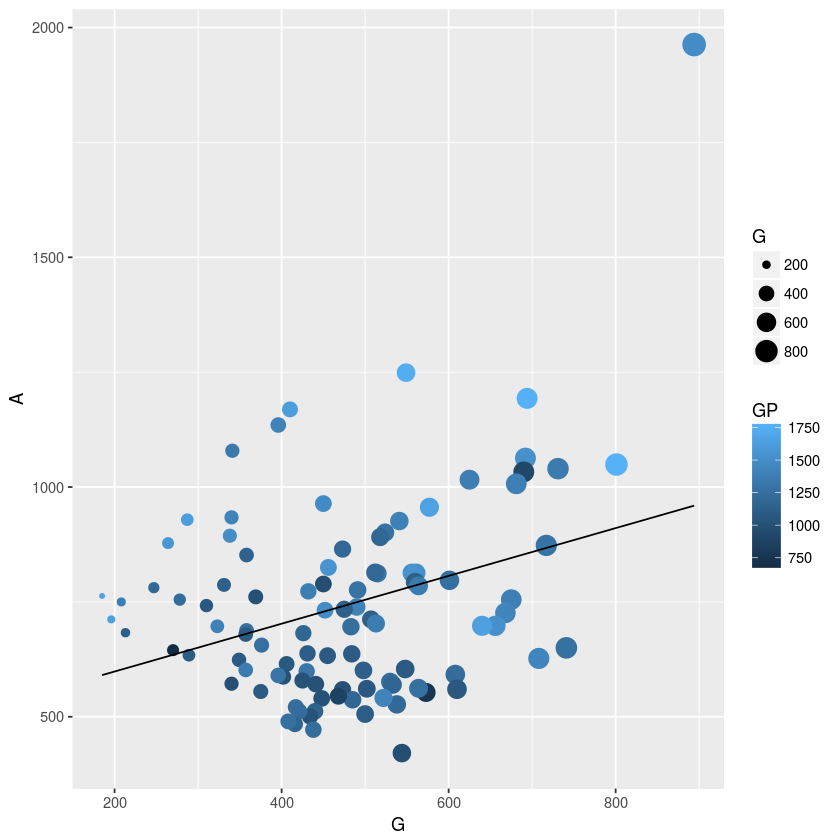

In [89]:
lmodel <- lm(A~G, data)
linex <- predict(lmodel)
ggplot(data, aes(x=G, y=A)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))
summary(lmodel)

# Fitting the Line Through Wayne Gretzky
Since we know that the coordinates for Wayne Gretzky are (894,1963) from the table shown above, let us force the line through that and note the R2 and P values.

R2 - 0.1082<br/>
P - 0.0008317


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


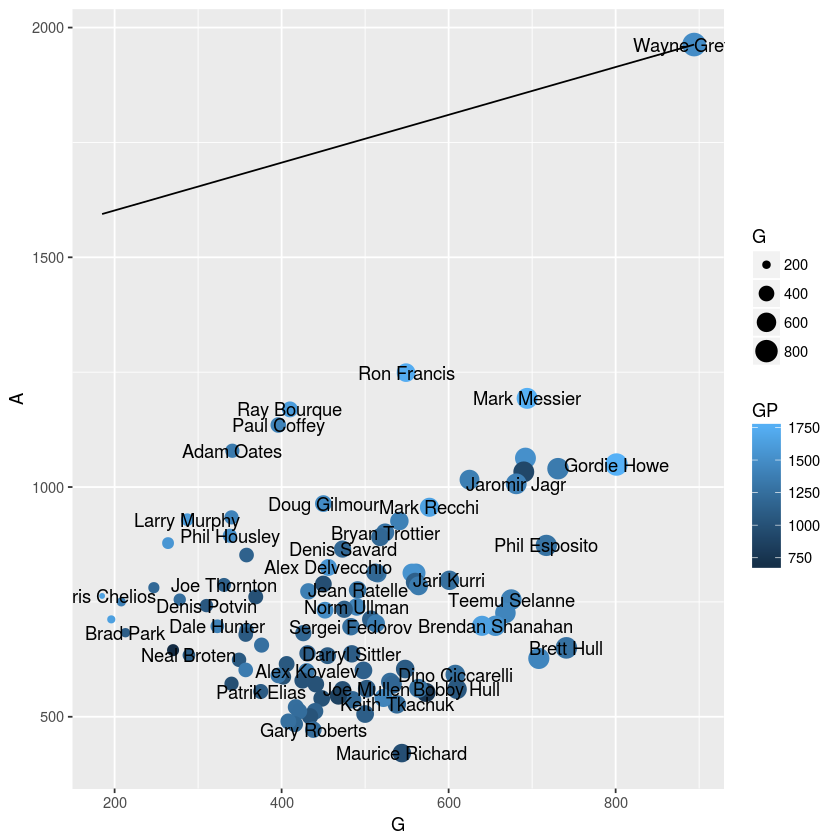

In [72]:
lmodel <- lm(I(A-1963)~I(G-894), data)
cf <- coef(lmodel)
linex <- predict(lm(I(A-cf[1])~I(G), data))
ggplot(data, aes(x=G, y=A, label = Player)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex)) + 
    geom_text(check_overlap = T)
summary(lmodel)

# Adding new data for Patrick Kane and Fitting the Line 
After researching, I found the data for Patrick Kane and then fitted the line through his coordinates just like it was done with Wayne Gretzky.

R2 - 0.1161<br/>
P - 0.000488

In [74]:
new_data <- data.frame(NA,"Patrick Kane",NA,NA,NA,NA,733,284,460,744,77,284,336,1,49,NA,3,2286)
names(new_data) <- names(data)
new_data <- rbind(data,new_data)


Call:
lm(formula = I(A - 460) ~ I(G - 284), data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.91  126.24  997.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 177.0386    34.9740   5.062 1.92e-06 ***
I(G - 284)    0.5382     0.1492   3.607 0.000488 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.1072 
F-statistic: 13.01 on 1 and 99 DF,  p-value: 0.000488


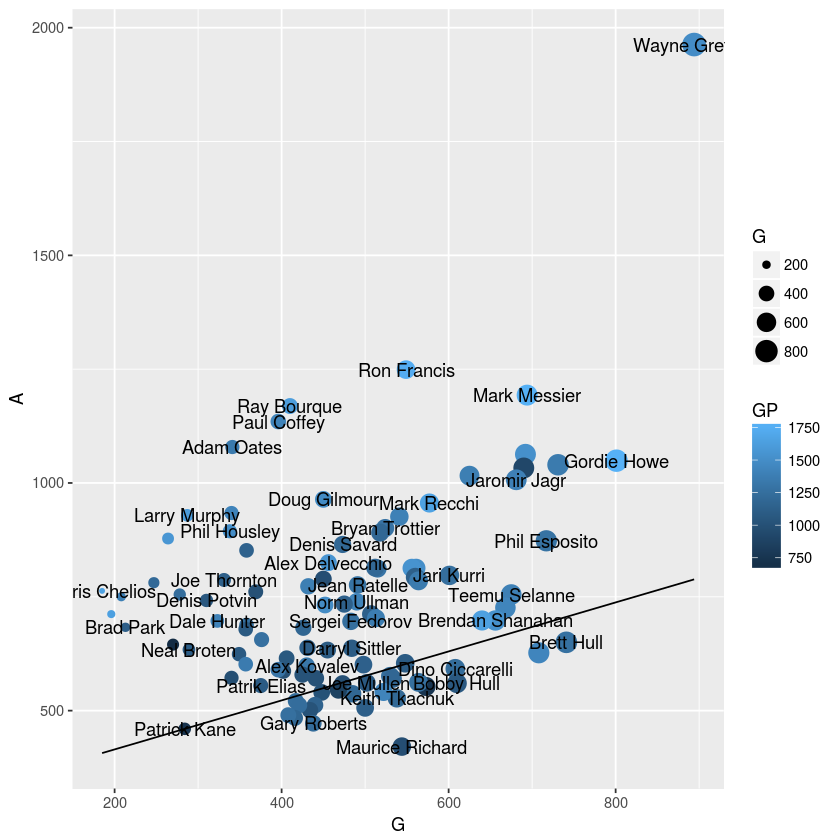

In [76]:
lmodel <- lm(I(A-460)~I(G-284), new_data)
cf <- coef(lmodel)
linex <- predict(lm(I(A-cf[1])~I(G), new_data))
ggplot(new_data, aes(x=G, y=A, label = Player)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex)) + 
    geom_text(check_overlap = T)
summary(lmodel)

# Fitting the Line Through Wayne Gretzky and (0,0)
Since we know that the coordinates for Wayne Gretzky are (894,1963) from the table shown above, let us force the line through that and note the R2 and P values.

R2 - 0.9091<br/>
P - < 2.2e-16


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


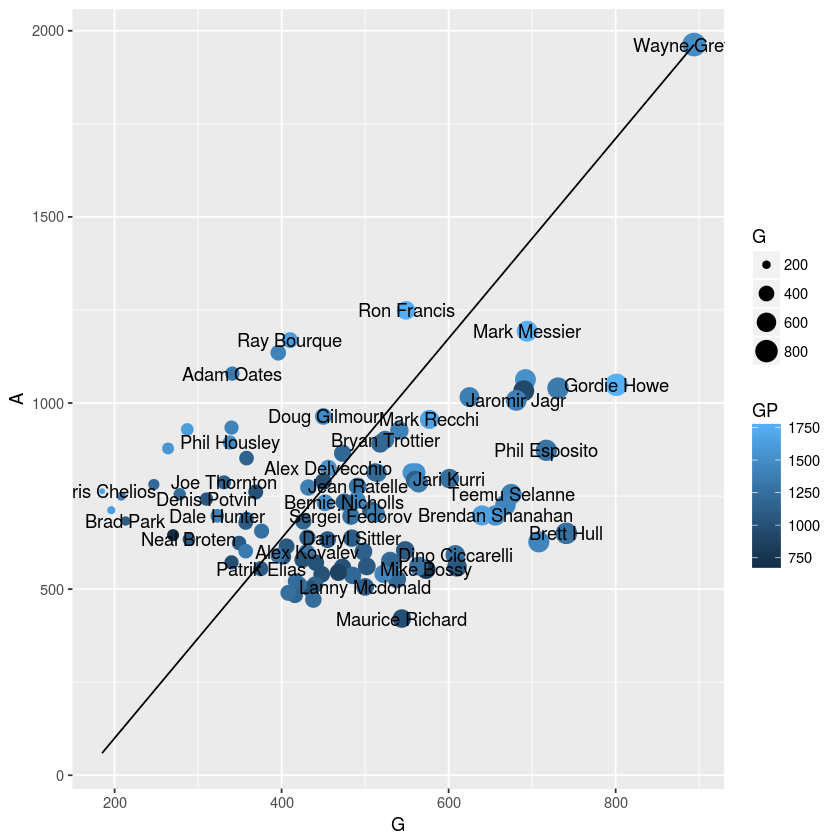

In [21]:
lmodel <- lm(I(A-1963) ~ I(G-894) + 0, data)
linex <- predict(lmodel) + 1963 
ggplot(data, aes(x=G, y=A, label = Player)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex)) + 
    geom_text(check_overlap = T)
summary(lmodel)

# Fitting the Line Through Patrick Kane and (0,0)
Since we know that the coordinates for Wayne Gretzky are (894,1963) from the table shown above, let us force the line through that and note the R2 and P values.

R2 - 0.5789<br/>
P - < 2.2e-16


Call:
lm(formula = I(A - 460) ~ I(G - 284) + 0, data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.74 -112.48   40.47  168.26  802.11 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 284)    1.149      0.098   11.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5747 
F-statistic: 137.5 on 1 and 100 DF,  p-value: < 2.2e-16


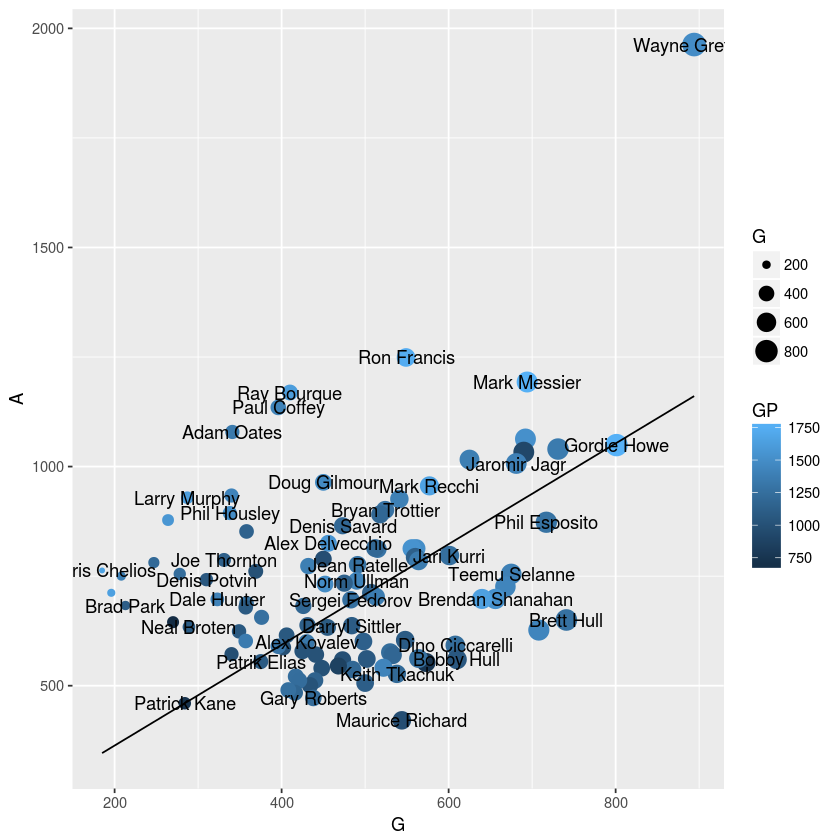

In [14]:
lmodel <- lm(I(A-460) ~ I(G-284) + 0, new_data)
linex <- predict(lmodel)+460
ggplot(new_data, aes(x=G, y=A, label = Player)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex)) + geom_text(check_overlap = T)
summary(lmodel)

# Fitting the Model through (0,0)
##### Using the Data without the Patrick Kane Data
Fitting the default linear regression to go through (0,0), while plotting the new data.

R2 - 0.8982<br/>
P - < 2.2e-16


Call:
lm(formula = A ~ G + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


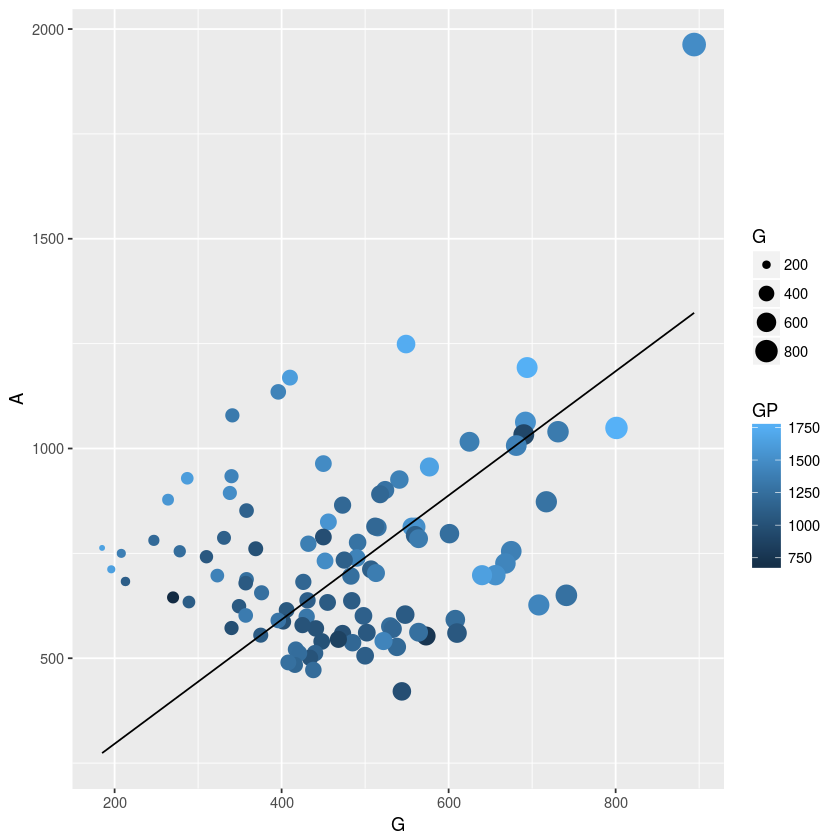

In [102]:
lmodel <- lm(A ~ G +0, data)
linex <- predict(lmodel)
summary(lmodel)
ggplot(data, aes(x=G, y=A)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))

# Tabulating the Result for R2 and P, by model name

In [103]:
r2 <- c(0.1082,0.1082,0.1161,0.9091,0.5789,0.8982)
p <- c("0.0008317","0.0008317","0.000488","< 2.2e-16", "< 2.2e-16", "< 2.2e-16")
model <- c("Default Model","Line Through Wayne Gretzky","Line Through Patrick Kane","Line Through Wayne Gretzky and origin","Line Through Patrick Kane and origin","Line Through Origin")
results <- data.frame(model,r2,p)

In [104]:
results

model,r2,p
Default Model,0.1082,0.0008317
Line Through Wayne Gretzky,0.1082,0.0008317
Line Through Patrick Kane,0.1161,0.000488
Line Through Wayne Gretzky and origin,0.9091,< 2.2e-16
Line Through Patrick Kane and origin,0.5789,< 2.2e-16
Line Through Origin,0.8982,< 2.2e-16


# Interpretation of Resuts
For the best fit of the Linear Regression model, we need the R2 value to be as close to 1 as possible. In all our fitted models, we can see that the best model is when we force the regression line through Wayne Gretzky and origin, whereas the worst fit is the default fit that R generated for us either default or throught Wayne.

Even when we force the Y intercept to be equal to 0, i.e. force the line through origin even then the R2 value increases significantly.

For the case of P, which decides the quality of our data, we need the value of p < 0.05 for the data to be classified as good. In all of our cases, the value of P lies below 0.05 which simply means that the quality of our data is good and does not contain noise.